In [1]:
%%writefile val_removed.txt
0_raw/val/i/b1b31c10-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b190eca8-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/viii/b208a1f8-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/viii/b1f457de-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b18a3566-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/iii/b3711048-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/viii/b20cb5fe-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/iv/b237f6ec-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/ix/b272b408-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/v/b2c9b9b0-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/ix/b2b5fa42-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b177400a-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b18436ac-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b1b1c82e-ce5d-11eb-b317-38f9d35ea60f.png
0_raw/val/i/b1a66e16-ce5d-11eb-b317-38f9d35ea60f.png

Writing val_removed.txt


In [10]:
from io import BytesIO
from PIL import Image as PIL_Image
from IPython.display import display, Image
import shutil, os
import cv2

def display_img_array(ima):
    im = PIL_Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))


# with open('val_removed.txt','r') as f:
#     paths = f.read().split('\n')[:-1]
# for path in paths:
#     t = path.split('/')
#     p = '/'.join(t[2:])
#     full_path = os.path.join('/DataCentric/data/val',p)
#     display_img_array(cv2.imread(full_path))
#     print(full_path)
    

In [11]:
from dataset_s import CustomDataset

dataset = CustomDataset('/DataCentric/data/val_remove', False, False, 64)

In [25]:
# import numpy as np
# import torch
# i = iter(dataset)
# while 1:
#     try:
#         item = next(i)
#     except:
#         break
#     display_img_array(torch.permute(item[0]*125,[1,2,0]).numpy().astype(np.uint8))
#     print(item[1])
#     print(item[2])
dataset.dataset.classes

['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']

In [27]:
import shutil, os
with open('/DataCentric/val_remove_fastdup.txt','r') as f:
    paths = f.read().split('\n')[:-1]
for path in paths:
    t = path.split('/')
    p = '/'.join(t[2:])
    full_path = os.path.join('/DataCentric/data/val',p)
    os.remove(full_path)
    

In [43]:
import shutil, os
import csv

with open('/DataCentric/val_wronglabels.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        source_path, new_class  = row[0].split(',')
        source_path = os.path.join('/DataCentric/',source_path)
        name = os.path.basename(source_path)
        dst = os.path.join(os.path.join('/DataCentric/data/val/', new_class),name)
        shutil.move(source_path, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/DataCentric/data/val/i/b17e949a-ce5d-11eb-b317-38f9d35ea60f.png'

In [12]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(4, 2)

In [15]:
import cv2
import glob
folders = glob.glob('/DataCentric/data/val/*')
arr = []
for folder in folders:
    images = glob.glob(folder + '/*')
    for im in images:
        arr.append(cv2.imread())

['/DataCentric/data/val/i',
 '/DataCentric/data/val/ii',
 '/DataCentric/data/val/iii',
 '/DataCentric/data/val/iv',
 '/DataCentric/data/val/ix',
 '/DataCentric/data/val/v',
 '/DataCentric/data/val/vi',
 '/DataCentric/data/val/vii',
 '/DataCentric/data/val/viii',
 '/DataCentric/data/val/x']

In [32]:
import pandas as pd
df2 = pd.DataFrame({'label': [],'path': [],'type': [],'checker': []})
df2.to_csv("/DataCentric/keep.csv", index=False)

In [1]:
import cv2
import glob
import pandas
import shutil
import os
df= pandas.read_csv('/DataCentric/potential_wrong_label_2.csv')[['img_path','label']]
for i in range(len(df)):
    src = df.iloc[i]['img_path']
    name =os.path.basename(src)
    label_folder = df.iloc[i]['label']
    shutil.copy(src=src, dst=os.path.join('/DataCentric/my_data',label_folder) + '/' + name)

FileNotFoundError: [Errno 2] No such file or directory: '/DataCentric/potential_wrong_label_2.csv'

In [127]:
import pandas as pd
import glob
import os
import shutil
csv_files = glob.glob("/DataCentric/csv_files/*")

df = pd.concat(map(pd.read_csv, csv_files))

In [128]:
removed_df = df[df['type'] == 'remove']["path"]
removed_df = removed_df.drop_duplicates()
for i in range(len(removed_df)):
    src = removed_df.iloc[i]
    name = os.path.basename(src)
    dst = "/DataCentric/data/train_removed/" + name
    shutil.move(src=src, dst=dst)

In [129]:
removed_df [removed_df == '/DataCentric/data/train/ix/af88d308-ce5d-11eb-b317-38f9d35ea60f.png']

Series([], Name: path, dtype: object)

In [130]:
relabel_df = df[df['type'] == 'relabel']
t = 0
for i in range(len(relabel_df)):
    item = relabel_df.iloc[i]
    new_label = item['label']
    src = item['path']
    s = src.split('/')
    s[-2] = new_label
    dst = '/'.join(s)
    try:
        shutil.move(src=src,dst=dst)
        t+=1
    except:
        continue
print('Relabel:',t)
    

Relabel: 23


In [133]:
folders = glob.glob('/DataCentric/data/train/*')
for folder in folders:
    images = glob.glob(folder+ '/*')
    print(folder, len(images))

/DataCentric/data/train/i 245
/DataCentric/data/train/ii 161
/DataCentric/data/train/iii 167
/DataCentric/data/train/iv 262
/DataCentric/data/train/ix 230
/DataCentric/data/train/v 193
/DataCentric/data/train/vi 172
/DataCentric/data/train/vii 183
/DataCentric/data/train/viii 189
/DataCentric/data/train/x 177


# Augment

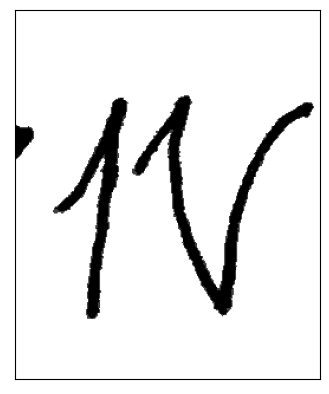

In [72]:
from torchvision.io import read_image, write_png
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms.functional as F
from torchvision import transforms


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def read_im(path):
    return read_image(path,torchvision.io.image.ImageReadMode.RGB)
im = read_im('/DataCentric/data/cleaned_train/iv/add8501a-ce5d-11eb-b317-38f9d35ea60f.png')
show([im])

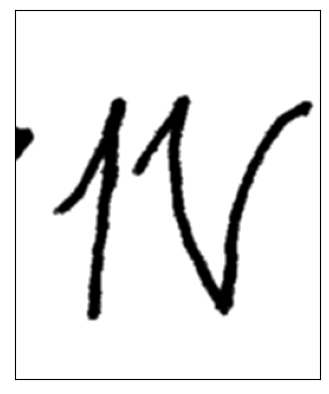

In [57]:
t = torch.nn.Sequential(
    transforms.RandomRotation(25,fill=255),
    transforms.GaussianBlur(3),
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

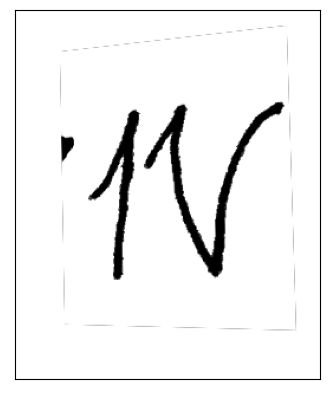

In [66]:
t = torch.nn.Sequential(
    transforms.RandomPerspective(p=1,fill=255,distortion_scale=0.5)
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

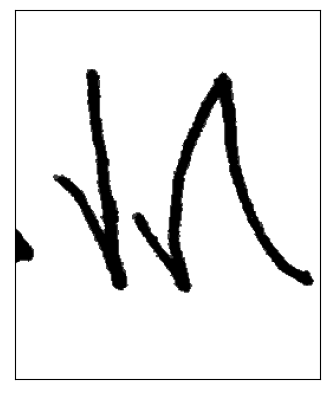

In [67]:
t = torch.nn.Sequential(
    transforms.RandomVerticalFlip(p=1)
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

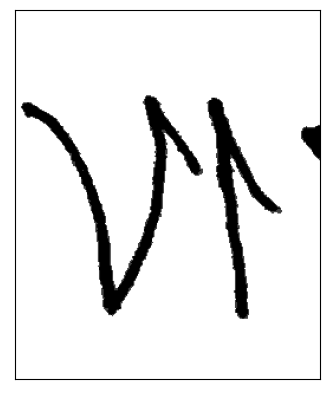

In [68]:
t = torch.nn.Sequential(
    transforms.RandomHorizontalFlip(p=1)
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

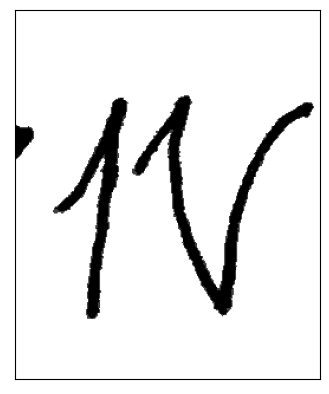

In [69]:
t = torch.nn.Sequential(
    transforms.GaussianBlur(kernel_size=3)
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

In [ ]:
t = torch.nn.Sequential(
    transforms.RandomAffine()
)
scripted_t = torch.jit.script(t)
show([scripted_t(im)])

In [79]:
t = torch.nn.Sequential(
    transforms.RandomRotation(15, fill=255),
    transforms.RandomPerspective(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=3),
)
scripted_t = torch.jit.script(t)

In [154]:
import glob
import os
cls = 'x'
image_folder = '/DataCentric/data/cleaned_train/'+ cls + '/*'
images = glob.glob(image_folder)
augmented_folder = '/DataCentric/data/augmented_data_v2/' + cls
# augmented_folder = '/DataCentric/data/augmented_data_v2/' + 'vi'
t = torch.nn.Sequential(
    transforms.RandomRotation(15, fill=255),
    transforms.RandomPerspective(p=0.5, fill=255),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=3),
)
scripted_t = torch.jit.script(t)
for i in range(3):
    for image in images:
        name = f'aug{i}_' + os.path.basename(image)
        im =read_im(image)
        augmented_im = scripted_t(im)
        dst = os.path.join(augmented_folder,name)
        write_png(augmented_im,dst)